**1. Foundational Knowledge:**
   - Understand the principles of Recurrent Neural Networks (RNNs) and their suitability for sequential data processing tasks.


***Principles of Recurrent Neural Networks (RNNs):***

RNNs are a class of neural networks designed to handle sequential data by maintaining a form of memory through loops within the network.

Unlike traditional feedforward neural networks, RNNs have connections that feed the output from a previous step back into the network as input for the current step. This allows the network to retain information about previous elements in the sequence.

This internal state (or hidden state) is updated at each time step, enabling the network to learn temporal dependencies and patterns over sequences.

***Suitability for Sequential Data Processing:***

Many real-world data types—such as text, speech, time series, and video—are inherently sequential, where the meaning or outcome depends on the order and context of previous elements.

RNNs naturally model this sequential dependency because they process input one element at a time, preserving contextual information from earlier inputs.

This makes RNNs particularly effective for tasks like language modeling, speech recognition, machine translation, and any scenario where understanding context across time is crucial.



- Familiarize yourself with different RNN architectures such as vanilla RNNs, Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU).


***Vanilla RNNs: ***The basic form of recurrent neural networks that maintain a hidden state to capture sequence information but are prone to vanishing/exploding gradients, limiting their ability to learn long-term dependencies.

***Long Short-Term Memory (LSTM):*** An advanced RNN variant that uses memory cells and gating mechanisms (input, forget, and output gates) to effectively remember and forget information over long sequences, overcoming the limitations of vanilla RNNs.

***Gated Recurrent Unit (GRU):*** A streamlined alternative to LSTM with fewer gates (update and reset gates), offering comparable performance with greater computational efficiency, making it popular for many sequential tasks.

***- Recognize the advantages of RNNs in capturing temporal dependencies in sequential data.***

Recognize the advantages of RNNs in capturing temporal dependencies in sequential data:

***Sequential Memory Through Hidden States:***
RNNs process input data one element at a time while maintaining an internal state (called the hidden state) that acts like memory. This hidden state carries information from previous time steps forward, enabling the network to understand how past inputs influence the current one.

***Modeling Context Over Time:***
Because RNNs consider both the current input and the hidden state from prior steps, they can capture the context and temporal relationships in data sequences. This is essential for tasks where the order of data points affects the outcome, such as language (where the meaning of a word depends on previous words), or time series (where future values depend on past trends).

***Handling Variable-Length Sequences:***
Unlike traditional feedforward networks, RNNs can process sequences of varying lengths, making them flexible for real-world sequential data like sentences, audio signals, or sensor data streams.

***Better Performance on Sequential Tasks:***
This temporal dependency modeling allows RNNs to outperform other models on many tasks such as speech recognition, machine translation, text generation, and forecasting, where understanding the flow of information over time is critical.

***Capturing Long-Range Dependencies (with LSTM/GRU):***
Advanced RNN variants like LSTM and GRU can capture long-term dependencies by overcoming issues like vanishing gradients, further enhancing the network's ability to learn from distant past inputs in a sequence.

***2. Data Exploration:***
   - Analyze the dataset's structure and characteristics, paying particular attention to the textual data and sentiment labels.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Sample: Load dataset (assuming a CSV file with 'text' and 'sentiment' columns)
columns=["ID","ENTITY","Label","Text"]
df = pd.read_csv('twitter_training.csv',names=columns)

df.head()

,ID,ENTITY,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# 1. Basic dataset info
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("\nSample data:")
print(df.head())

# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Dataset shape: (74682, 4)
Columns: Index(['ID', 'ENTITY', 'Label', 'Text'], dtype='object')

Sample data:
     ID       ENTITY     Label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Missing values per column:
ID          0
ENTITY      0
Label       0
Text      686
dtype: int64


In [ ]:
df.isnull().any().sum()

np.int64(1)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

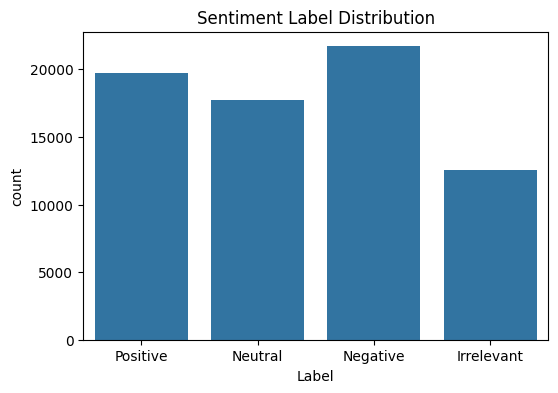

In [ ]:
# 3. Distribution of sentiment labels
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title('Sentiment Label Distribution')
plt.show()

In [ ]:
'''inference : negative sentimate is more than other sentimate'''

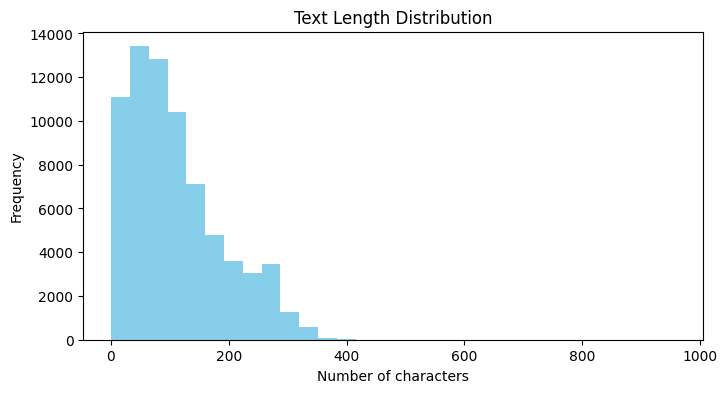

In [ ]:
# 4. Text length distribution
df['text_length'] = df['Text'].apply(len)
plt.figure(figsize=(8,4))
plt.hist(df['text_length'], bins=30, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.show()


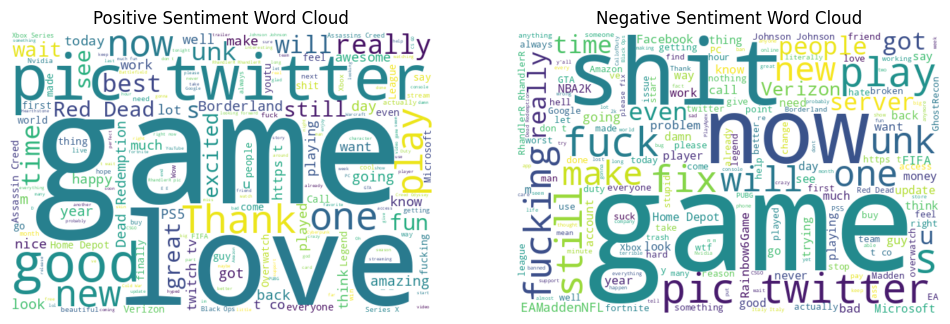

In [ ]:

# 5. Word Cloud for Positive and Negative sentiments
positive_text = ' '.join(df[df['Label'] == 'Positive']['Text'])
negative_text = ' '.join(df[df['Label'] == 'Negative']['Text'])

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()


  ***- Explore preprocessing techniques for text data, such as tokenization, padding, and vectorization.***


**🔹 Preprocessing Techniques for Text Data**


**1. Tokenization**

Breaks text into individual words (tokens), which are then mapped to integers.

**2. Padding**
Ensures all input sequences are of the same length by adding zeros to shorter sequences.

**3. Vectorization (Integer Encoding)**
Converts words into numerical format suitable for input into machine learning models.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Extract tweets and labels
tweets = df['Text'].astype(str).tolist()   # Make sure text is string
labels = df['Label'].tolist()            # Assuming sentiment labels exist


In [ ]:
# 1. Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Adjust vocab size as needed
tokenizer.fit_on_texts(tweets)
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")

Vocabulary size: 33784


In [ ]:

# Convert tweets to sequences
sequences = tokenizer.texts_to_sequences(tweets)
print("Sample sequence:", sequences[0])

Sample sequence: [312, 174, 14, 144, 5, 3, 53, 1790, 13, 28]


In [ ]:
# 2. Padding sequences
max_length = 50  # Typical max tweet length (adjust based on data exploration)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print("Shape of padded sequences:", padded_sequences.shape)
print("Sample padded sequence:", padded_sequences[0])

Shape of padded sequences: (71656, 50)
Sample padded sequence: [ 312  174   14  144    5    3   53 1790   13   28    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:

# Now padded_sequences is ready to be input for an RNN model

# Optional: Convert labels to numeric if not already
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
print("Sample encoded label:", labels_encoded[1000])

Sample encoded label: 3


***Explanation:***
Basic info and samples: Understand the size and structure of your dataset.

Missing values: Identify any data gaps to handle later.

Sentiment distribution: Check for class imbalance.

Text length: Helps in deciding padding/truncation length during preprocessing.

Word clouds: Visualize most frequent words per sentiment class to gain insights.

***Explanation:***
Tokenizer() – converts each word into an integer, creating a vocabulary.

texts_to_sequences() – transforms sentences into lists of integers.

pad_sequences() – makes all sequences of equal length by adding zeros.

The oov_token="<OOV>" handles words not seen during training (out-of-vocabulary words).



***3. Preprocessing and Feature Engineering:***
   - Preprocess the textual data by converting it into a suitable format for input to the RNN model.


***Goal:*** Transform raw text into a numerical format that RNNs can process efficiently.

# **Key Steps:**
***Text Cleaning (Optional but Recommended):***

Remove unnecessary characters (e.g., URLs, special symbols, emojis).

Convert text to lowercase for uniformity.

Handle contractions, punctuation, and stopwords as needed depending on the task.


***Tokenization***:

Convert sentences into sequences of tokens (words or subwords).

Typically done via libraries like Keras Tokenizer, SpaCy, or NLTK.


***Integer Encoding:***

Map tokens to integers based on a vocabulary.

Words outside the vocabulary can be marked as out-of-vocabulary (OOV).


***Padding/Truncation:***

Ensure all sequences have the same length by padding shorter ones (usually with zeros) or truncating longer ones.

This fixed-length input is required by most RNN implementations.


***(Optional) Embedding Preparation:***

Use an Embedding layer in the RNN model to convert integer tokens into dense vectors representing semantic meaning.

Alternatively, use pretrained embeddings like GloVe or Word2Vec.

In [ ]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example raw text data (e.g. tweets)
texts = [
    "I love this product! 😊 #awesome",
    "Worst service ever... Check this out: http://example.com",
    "Totally satisfied with the experience.",
    "Not what I expected :( #disappointed",
    "Excellent support and quality!"
]

# 1. Basic Text Cleaning Function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/emojis/special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

cleaned_texts = [clean_text(t) for t in texts]

# 2. Tokenization and Integer Encoding
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)

# 3. Padding sequences
max_length = 10
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print("Cleaned Texts:", cleaned_texts)
print("Sequences:", sequences)
print("Padded Sequences:\n", padded_sequences)


Cleaned Texts: ['i love this product awesome', 'worst service ever check this out', 'totally satisfied with the experience', 'not what i expected disappointed', 'excellent support and quality']
Sequences: [[2, 4, 3, 5, 6], [7, 8, 9, 10, 3, 11], [12, 13, 14, 15, 16], [17, 18, 2, 19, 20], [21, 22, 23, 24]]
Padded Sequences:
 [[ 2  4  3  5  6  0  0  0  0  0]
 [ 7  8  9 10  3 11  0  0  0  0]
 [12 13 14 15 16  0  0  0  0  0]
 [17 18  2 19 20  0  0  0  0  0]
 [21 22 23 24  0  0  0  0  0  0]]


# - Encode sentiment labels into numerical values if necessary.


In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load Twitter training dataset
columns=["ID","ENTITY","Label","Text"]
df = pd.read_csv('twitter_training.csv',names=columns)

# Check the unique sentiment labels
print("Unique sentiment labels:", df['Label'].unique())

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode sentiment labels to integers
df['sentiment_encoded'] = label_encoder.fit_transform(df['Label'])

# View mapping of labels to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label to integer mapping:", label_mapping)

# Check encoded labels
print(df[['Label', 'sentiment_encoded']].head())


Unique sentiment labels: ['Positive' 'Neutral' 'Negative' 'Irrelevant']
Label to integer mapping: {'Irrelevant': np.int64(0), 'Negative': np.int64(1), 'Neutral': np.int64(2), 'Positive': np.int64(3)}
      Label  sentiment_encoded
0  Positive                  3
1  Positive                  3
2  Positive                  3
3  Positive                  3
4  Positive                  3


***Explanation:***

LabelEncoder() converts string labels like 'positive', 'negative', 'neutral' into integer values (e.g., 0, 1, 2).


The mapping can be checked with label_mapping to understand which number corresponds to which label.


This encoded label column (sentiment_encoded) is what we use as target/output in model training.


## ***Important:***
For binary sentiment classification, labels might be just 0 and 1.

For multi-class classification (e.g., positive, neutral, negative), encoding handles multiple classes as integers.

If you plan to use categorical crossentropy loss, convert these integers to one-hot encoded vectors using to_categorical() from Keras.


#   - Split the dataset into training and testing sets, ensuring a balanced distribution of sentiment classes.

In [33]:

# Splitting features and labels
X = df['Text']  # Text data
y = df['sentiment_encoded'] # Encoded labels

# Perform stratified split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # This ensures balanced distribution of classes
)

# Check class distribution in original, train, and test sets
print("Original label distribution:\n", y.value_counts(normalize=True))
print("\nTraining label distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting label distribution:\n", y_test.value_counts(normalize=True))


Original label distribution:
 sentiment_encoded
1    0.301840
3    0.278943
2    0.245280
0    0.173937
Name: proportion, dtype: float64

Training label distribution:
 sentiment_encoded
1    0.301833
3    0.278952
2    0.245276
0    0.173939
Name: proportion, dtype: float64

Testing label distribution:
 sentiment_encoded
1    0.301868
3    0.278905
2    0.245297
0    0.173931
Name: proportion, dtype: float64


# ***4. RNN Model Construction:***
   - Choose an appropriate RNN architecture based on the nature of the sentiment analysis task and dataset size.


Key Considerations:
Nature of the Task:

Sentiment analysis is a sequential classification problem where the model must understand the order and context of words to predict sentiment accurately.

Dataset Size:

Small to medium datasets (thousands to tens of thousands of samples):
Use simpler architectures like LSTM or GRU with moderate complexity to avoid overfitting.

Large datasets (hundreds of thousands to millions):
You can experiment with deeper or stacked RNN layers and more complex models, including bidirectional RNNs or attention mechanisms.



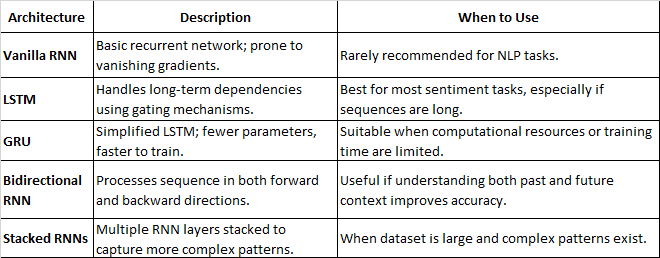

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

# 1. Load Dataset
columns=["ID","ENTITY","Label","Text"]
df = pd.read_csv('twitter_training.csv',names=columns)  # Replace with your actual file path

# 2. Basic preprocessing: Remove NaNs, convert text to string
df = df.dropna(subset=['Text', 'Label'])
tweets = df['Text'].astype(str).tolist()
sentiments = df['Label'].tolist()

# 3. Encode sentiment labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(sentiments)

# 4. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    tweets, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# 5. Tokenize text
vocab_size = 10000
max_length = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# 6. Pad sequences
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# 7. Build Bidirectional LSTM Model
embedding_dim = 128
num_classes = len(label_encoder.classes_)

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 8. Train the model
history = model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_padded, y_test)
)

# 9. Evaluate on test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 139s 145ms/step - accuracy: 0.5229 - loss: 1.0981 - val_accuracy: 0.7315 - val_loss: 0.7087
Epoch 2/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 139s 142ms/step - accuracy: 0.7883 - loss: 0.5669 - val_accuracy: 0.7878 - val_loss: 0.5710
Epoch 3/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 141s 141ms/step - accuracy: 0.8533 - loss: 0.4033 - val_accuracy: 0.8120 - val_loss: 0.5195
Epoch 4/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 143s 142ms/step - accuracy: 0.8796 - loss: 0.3273 - val_accuracy: 0.8232 - val_loss: 0.4981
Epoch 5/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.9002 - loss: 0.2720 - val_accuracy: 0.8347 - val_loss: 0.4932
463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8360 - loss: 0.4764
Test Accuracy: 0.8347


In [47]:

# 5. Tokenize text
vocab_size = 10000
max_length = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# 6. Pad sequences
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# 7. Build Bidirectional LSTM Model
embedding_dim = 128
num_classes = len(label_encoder.classes_)

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 8. Train the model
history = model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_padded, y_test)
)

# 9. Evaluate on test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 140s 146ms/step - accuracy: 0.5207 - loss: 1.1061 - val_accuracy: 0.7385 - val_loss: 0.6928
Epoch 2/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 132s 143ms/step - accuracy: 0.7923 - loss: 0.5670 - val_accuracy: 0.7884 - val_loss: 0.5672
Epoch 3/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 133s 144ms/step - accuracy: 0.8477 - loss: 0.4090 - val_accuracy: 0.8139 - val_loss: 0.5234
Epoch 4/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 140s 142ms/step - accuracy: 0.8764 - loss: 0.3314 - val_accuracy: 0.8182 - val_loss: 0.5171
Epoch 5/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.8963 - loss: 0.2781 - val_accuracy: 0.8327 - val_loss: 0.5076
463/463 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8361 - loss: 0.4869
Test Accuracy: 0.8327


463/463 - 9s - 18ms/step - accuracy: 0.8327 - loss: 0.5076


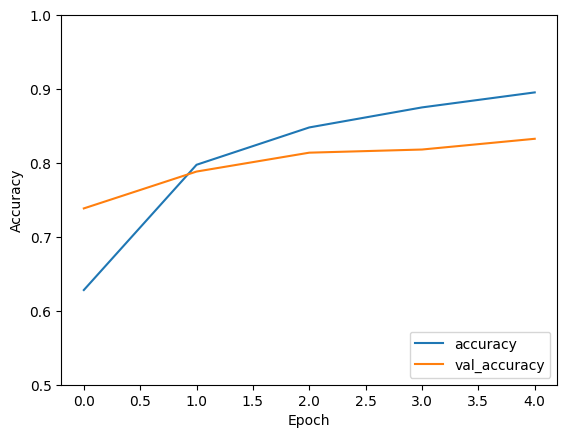

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_padded,  y_test, verbose=2)

In [50]:
print(test_acc)

0.8327026963233948


# ***5. Model Training:***
   - Train the RNN model on the training data, monitoring performance metrics such as accuracy and loss on validation data.
   - Implement techniques to prevent overfitting, such as early stopping and dropout regularization.


In [51]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'model' is your compiled RNN (e.g., LSTM) model from earlier steps
# and X_train_padded, y_train, X_val_padded, y_val are prepared datasets.

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=3,              # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Train the model
history = model.fit(
    X_train_padded, y_train,
    epochs=20,               # Set a reasonably high max epochs
    batch_size=64,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stop]   # Pass EarlyStopping callback
)


Epoch 1/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 133s 144ms/step - accuracy: 0.9101 - loss: 0.2361 - val_accuracy: 0.8374 - val_loss: 0.5205
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 137s 139ms/step - accuracy: 0.9236 - loss: 0.2043 - val_accuracy: 0.8464 - val_loss: 0.5023
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 146s 143ms/step - accuracy: 0.9301 - loss: 0.1811 - val_accuracy: 0.8486 - val_loss: 0.5377
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 139s 139ms/step - accuracy: 0.9344 - loss: 0.1739 - val_accuracy: 0.8514 - val_loss: 0.5231
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 132s 142ms/step - accuracy: 0.9394 - loss: 0.1521 - val_accuracy: 0.8518 - val_loss: 0.5618


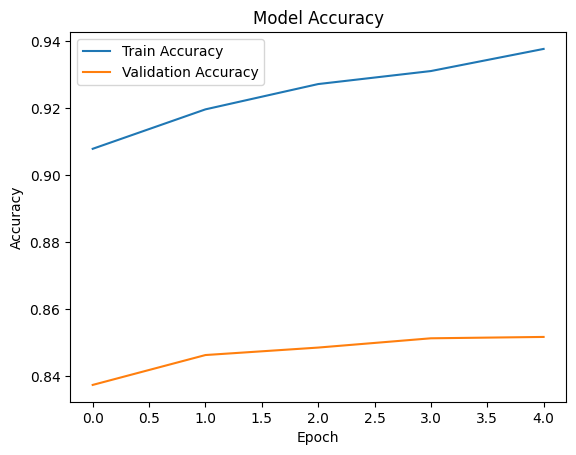

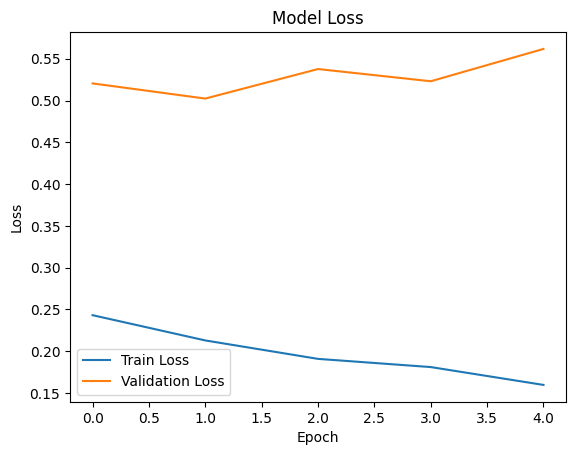

In [52]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# ***6. Model Evaluation:***
   - Evaluate the trained RNN model on the testing data using evaluation metrics such as accuracy, precision, recall, and F1-score.
   - Analyze the model's performance across different sentiment classes and identify any biases or shortcomings.


In [53]:
import numpy as np

# Predict class probabilities
y_pred_prob = model.predict(X_test_padded)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)


463/463 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step


In [54]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

print("Class-wise Precision:", precision)
print("Class-wise Recall:", recall)
print("Class-wise F1-score:", f1)

# Detailed classification report
target_names = label_encoder.classes_  # Assuming you have label_encoder from earlier steps
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Test Accuracy: 0.8464
Class-wise Precision: [0.85523571 0.86420567 0.84578517 0.82299652]
Class-wise Recall: [0.7961165  0.87947227 0.82827167 0.85766158]
Class-wise F1-score: [0.82461786 0.87177214 0.83693681 0.83997155]

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.86      0.80      0.82      2575
    Negative       0.86      0.88      0.87      4472
     Neutral       0.85      0.83      0.84      3622
    Positive       0.82      0.86      0.84      4131

    accuracy                           0.85     14800
   macro avg       0.85      0.84      0.84     14800
weighted avg       0.85      0.85      0.85     14800



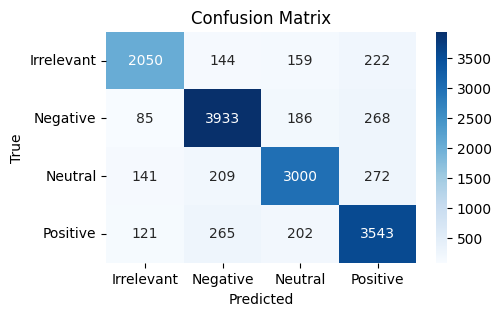

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# ***7. Fine-tuning and Optimization:***
   - Fine-tune the RNN model by adjusting hyperparameters such as learning rate, batch size, and regularization strength.
   - Explore techniques for optimizing RNN performance, such as gradient clipping and learning rate scheduling.


# Key Hyperparameters to Tune:
***Learning Rate:***

Controls how much the model weights are updated during training.

Too high: training may be unstable or diverge.

Too low: slow convergence or getting stuck in local minima.

Start with common values like 0.001, then experiment (e.g., 0.0005, 0.0001).

***Batch Size:***

Number of samples processed before the model updates weights.

Smaller batches often give more noisy gradient estimates but better generalization.

Larger batches stabilize updates but require more memory.

Typical batch sizes: 32, 64, 128.

***Regularization Strength:***

Controls dropout rates or L2 weight decay to prevent overfitting.

Typical dropout values: 0.2 to 0.5.

# Techniques to Optimize RNN Training:

**Gradient Clipping:**

Prevents exploding gradients by capping gradients during backpropagation.

Helps training stability especially in deep or long-sequence RNNs.

**Learning Rate Scheduling:**

Dynamically adjusts learning rate during training to improve convergence.

Common methods: Reduce learning rate on plateau, step decay, cosine annealing.

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 1. Define optimizer with gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # clipnorm clips gradients by norm

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# 2. Learning Rate Scheduler: Reduce LR when val_loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Reduce LR by half
    patience=2,          # Wait 2 epochs before reducing LR
    verbose=1,
    min_lr=1e-6
)

# 3. Train model with scheduler and early stopping
history = model.fit(
    X_train_padded, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_padded, y_test),
    callbacks=[lr_scheduler, early_stop]
)


Epoch 1/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.9310 - loss: 0.1839 - val_accuracy: 0.8499 - val_loss: 0.4964 - learning_rate: 0.0010
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.9382 - loss: 0.1639 - val_accuracy: 0.8504 - val_loss: 0.5542 - learning_rate: 0.0010
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9444 - loss: 0.1458
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
925/925 ━━━━━━━━━━━━━━━━━━━━ 139s 144ms/step - accuracy: 0.9444 - loss: 0.1459 - val_accuracy: 0.8509 - val_loss: 0.5648 - learning_rate: 0.0010
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.9493 - loss: 0.1300 - val_accuracy: 0.8570 - val_loss: 0.6002 - learning_rate: 5.0000e-04
